In [1]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score

In [2]:
df = pd.read_csv("spam.csv", encoding="utf-8", encoding_errors="ignore", )

DATA CLEANING

In [3]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [6]:
k = df[df.duplicated(subset=["v2"], keep=False)].index
df["v1"].iloc[k].value_counts()

v1
ham     503
spam    183
Name: count, dtype: int64

In [7]:
df["v1"].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
df.rename(columns={"v1": "target", "v2": "message"}, inplace=True)
df.drop_duplicates(keep="first", inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df["target"] = encoder.fit_transform(df["target"])

In [13]:
df

target                                            message
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0               Will _ b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5168 rows x 2 columns]

EDA --- Exploratory Data Analysis

In [14]:
df["target"].value_counts()

target
0    4516
1     652
Name: count, dtype: int64

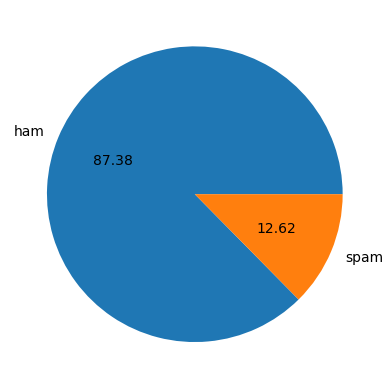

In [15]:
plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f")
plt.show()

In [16]:
!pip install nltk
import nltk
nltk.data.path.append('C:/nltk_data')
nltk.download('punkt', download_dir='C:/nltk_data')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:

df["num_of_characters"] = df.message.apply(len)
df["num_of_words"] = df.message.apply(lambda x: len(nltk.word_tokenize(x)))
df["num_of_sent"] = df.message.apply(lambda x: len(nltk.sent_tokenize(x)))


In [18]:
df

target                                            message  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0               Will _ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_of_characters  num_of_words  num_of_sent  
0                   111            24            2  
1                    29             8            2  
2                   155            37            2  
3                    49            13            1  
4                    61            15            1  
...                 ...           ...          ...  
5567                159            35            4  
5568                 36             9            1  
5569                 57            15            2  
5570                125            27            1  
5571                 26             7            2  

[5168 rows x 5 columns]

In [19]:
df[["num_of_characters", "num_of_words", "num_of_sent"]].describe()

num_of_characters  num_of_words  num_of_sent
count        5168.000000   5168.000000  5168.000000
mean           78.759481     18.441176     1.966331
std            58.104099     13.327587     1.449367
min             2.000000      1.000000     1.000000
25%            36.000000      9.000000     1.000000
50%            60.000000     15.000000     1.000000
75%           116.000000     26.000000     2.000000
max           910.000000    220.000000    38.000000

<Figure size 1200x600 with 0 Axes>

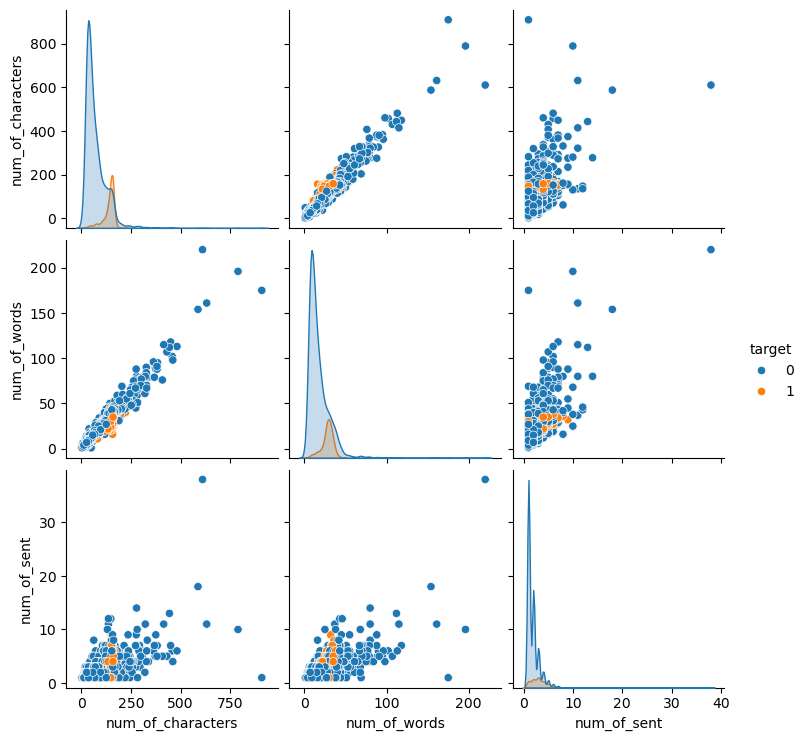

In [20]:

plt.figure(figsize=(12, 6))
sns.pairplot(df, hue="target")
plt.show()

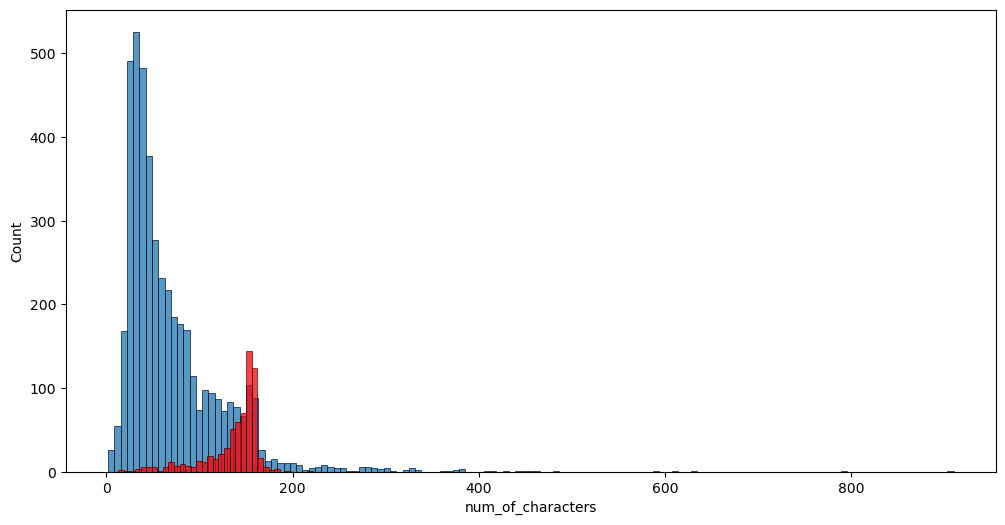

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_characters'])
sns.histplot(df[df['target'] == 1]['num_of_characters'],color='red')
plt.show()

<Axes: >

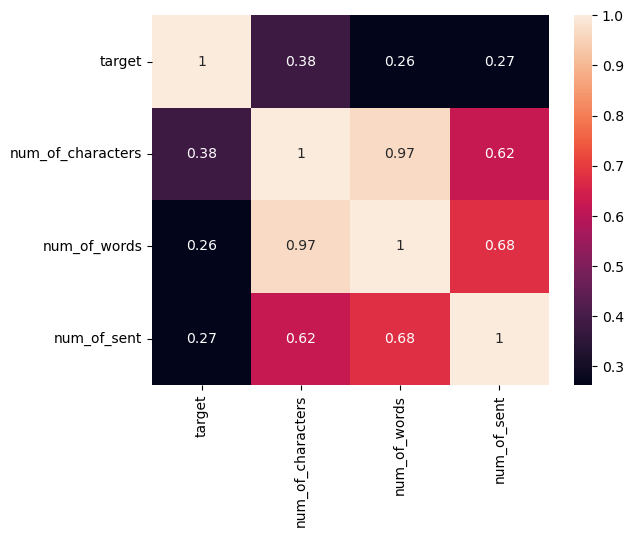

In [22]:
sns.heatmap(df.drop("message", axis=1).corr(),annot=True)

Data preprocessing
    -Lower case
    -Tokenization
    -Removing special characters
    -Removing stop words and punctuation
    -Stemming

In [23]:
nltk.word_tokenize("hellowine, heybhye hey %#2")

['hellowine', ',', 'heybhye', 'hey', '%', '#', '2']

In [24]:
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [25]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("love lover loving lovely")

'love lover loving lov'

In [26]:
def transform_test(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)
    

In [27]:
transform_test(df.message[1])

'ok lar joke wif u oni'

In [28]:
df["transformed_text"] = df.message.apply(transform_test)

In [29]:
df

target                                            message  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0               Will _ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_of_characters  num_of_words  num_of_sent  \
0                   111            24            2   
1                    29             8            2   
2                   155            37            2   
3                    49            13            1   
4                    61            15            1   
...                 ...           ...          ...   
5567                159            35            4   
5568                 36             9            1   
5569                 57            15            2   
5570                125            27            1   
5571                 26             7            2   

                                       transformed_text  
0     go jurong point crazi avail bugi n great world...  
1                                 ok lar joke wif u oni  
2     free entri 2 wkli comp win fa cup final tkt 21...  
3                   u dun say earli hor u c alreadi say  
4                  nah think goe usf live around though  
...                                                 ...  
5567  2nd time tri 2 contact u 750 pound prize 2 cla...  
5568                              b go esplanad fr home  
5569                                  piti mood suggest  
5570  guy bitch act like interest buy someth els nex...  
5571                                     rofl true name  

[5168 rows x 6 columns]

In [30]:
import wordcloud
from wordcloud import WordCloud

In [31]:
wc = WordCloud(width=400,height=200,background_color="white", min_font_size=2)
spam_words = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

In [32]:
wc = WordCloud(width=400,height=200,background_color="white", min_font_size=2)
ham_words = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

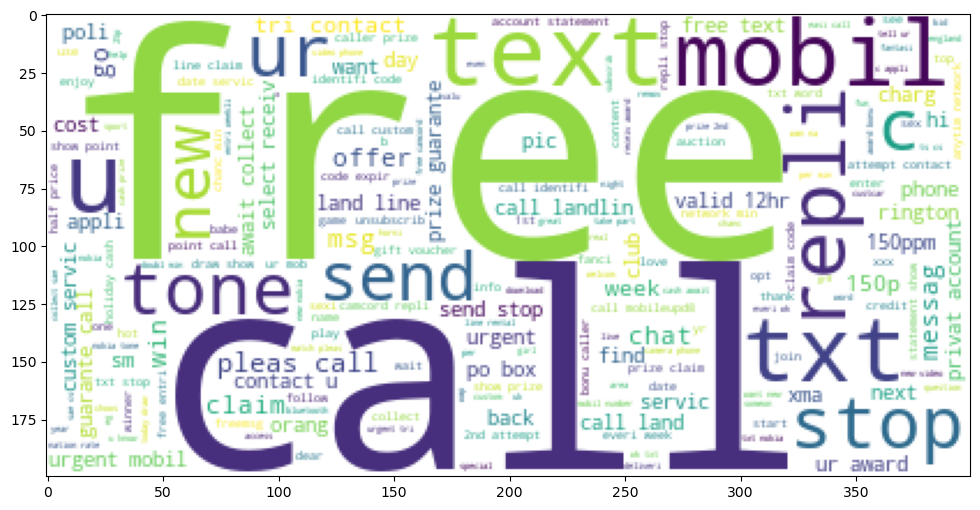

In [33]:
plt.figure(figsize=(15,6))
plt.imshow(spam_words)

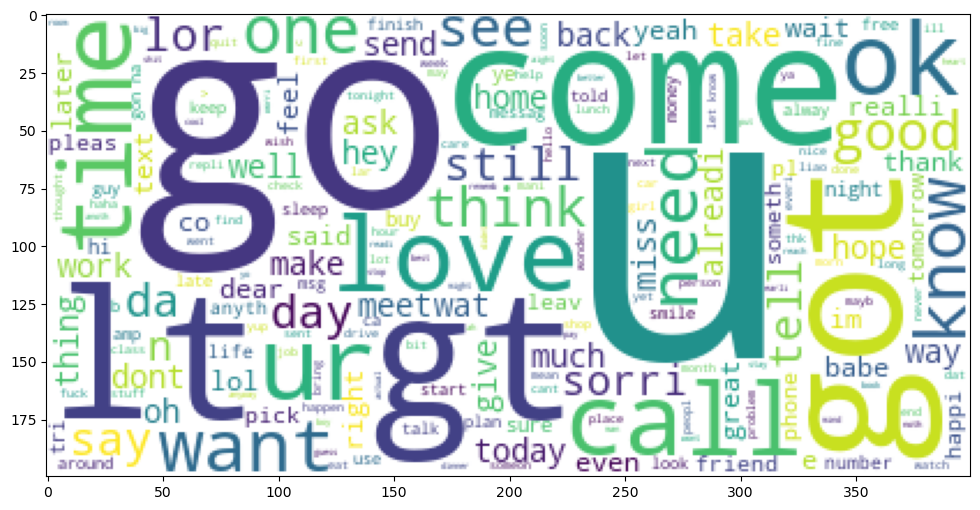

In [34]:
plt.figure(figsize=(12,6))
plt.imshow(ham_words)

In [35]:
spam_corpus = []
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for text in msg.split():
        spam_corpus.append(text)

In [36]:
len(spam_corpus)

10106

In [37]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 102),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 47),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

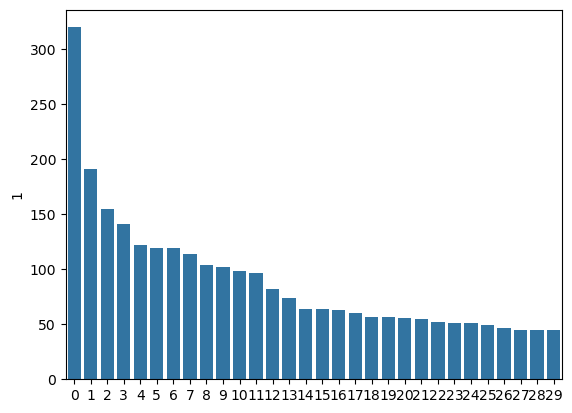

In [38]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='horizontal')
plt.show()

In [39]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [40]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [42]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [43]:
X.shape

(5168, 5000)

In [44]:
y = df["target"]

In [45]:
y.value_counts()

target
0    4516
1     652
Name: count, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
sm = SMOTE()
X_sample, y_sample =  sm.fit_resample(X, y)

In [48]:
X_sample.shape

(9032, 5000)

In [49]:
y_sample.value_counts()

target
0    4516
1    4516
Name: count, dtype: int64

In [50]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=2, test_size=0.2)
X_train_sample, X_test_sample, y_train_sample, y_test_sample=train_test_split(X_sample, y_sample, random_state=0, test_size=0.2)

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.model_selection import cross_val_score

In [52]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

print(np.mean(cross_val_score(gnb, X_train_sample, y_train_sample, cv=5)))
print(np.mean(cross_val_score(mnb, X_train_sample, y_train_sample, cv=5)))
print(np.mean(cross_val_score(bnb, X_train_sample, y_train_sample, cv=5)))

0.9182006920415224
0.9741176470588236
0.9869896193771627


In [53]:
print(np.mean(cross_val_score(gnb, X_train_sample, y_train_sample,  scoring='precision_weighted')))
print(np.mean(cross_val_score(mnb, X_train_sample, y_train_sample,  scoring='precision_weighted')))
print(np.mean(cross_val_score(bnb, X_train_sample, y_train_sample, scoring='precision_weighted')))

0.9297101959324306
0.9743470398352111
0.9872742401769082


In [54]:
print(np.mean(cross_val_score(gnb, X_train, y_train, cv=5)))
print(np.mean(cross_val_score(mnb, X_train, y_train, cv=5)))
print(np.mean(cross_val_score(bnb, X_train, y_train, cv=5)))

0.8744535955098947
0.9605684070607318
0.9700033084371003


In [55]:
print(np.mean(cross_val_score(gnb, X_train, y_train,scoring='precision_weighted')))
print(np.mean(cross_val_score(mnb, X_train, y_train,scoring='precision_weighted')))
print(np.mean(cross_val_score(bnb, X_train, y_train,scoring='precision_weighted')))

0.9143417324330858
0.9621183913061297
0.970288706864346


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [60]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [61]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [63]:
def classifier(model, X, y, X_test, y_test):
    model.fit(X, y)
    y_pred = model.predict(X_test)
    accuracy = model.score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [ ]:
classifier(svc, X_train, y_train, X_test, y_test)

In [64]:
model = []
accuracy_sampled = []
precision_sampled = []
accuracy = []
precision=[]

for name, model in clfs.items():
    accuracy , precision = classifier(model, X_train, y_train, X_test, y_test)
    accuracy_sampled, precision_sampled = classifier(model, X_train_sampled, y_train_sampled, X_test_sampled, y_test_sampled)
    
    model.append(name)
    accuracy_sampled.append(np.mean(accuracy_sampled))
    precision_sampled.append(np.mean(precision_sampled))
    accuracy.append(np.mean(accuracy))
    precision.append(np.mean(precision))
    

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [60]:
model_classification = pd.DataFrame([])

dict_items([('SVC', SVC(gamma=1.0, kernel='sigmoid')), ('KN', KNeighborsClassifier()), ('NB', MultinomialNB()), ('DT', DecisionTreeClassifier(max_depth=5)), ('LR', LogisticRegression(penalty='l1', solver='liblinear')), ('RF', RandomForestClassifier(n_estimators=50, random_state=2)), ('AdaBoost', AdaBoostClassifier(random_state=2)), ('BgC', BaggingClassifier(n_estimators=50, random_state=2)), ('ETC', ExtraTreesClassifier(n_estimators=50, random_state=2)), ('GBDT', GradientBoostingClassifier(n_estimators=50, random_state=2)), ('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_